In [1]:
# Open wav file and load into numpy array
import numpy as np
import wave
import matplotlib.pyplot as plt
import os

dataFolder = "data/audio/"

def load_wav_file(filename):
    wav = wave.open(filename, "r")
    frames = wav.readframes(-1)
    sound_info = np.frombuffer(frames, "int16")
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

def plot_wav_file(sound_info):
    plt.figure(num=None, figsize=(10, 5))
    plt.title('Raw wave')
    plt.ylabel('Amplitude')
    plt.plot(sound_info)
    plt.show()

# Plot the average amplitude of the audio file
def plot_average_amplitude(signal, title="Average amplitude"):
    plt.figure(num=None, figsize=(10, 5))
    plt.title(title)
    plt.ylabel('Amplitude')
    plt.axhline(np.average(np.abs(signal)) * 5, color='r')
    plt.plot(signal, alpha=0.5)
    plt.show()

def save_audio(signal, filename, denormalize=True):
    if denormalize:
        signal = signal * 30000
    
    signal = np.array(signal, dtype=np.int16)
    wavefile = wave.open(filename, "w")
    wavefile.setnchannels(1)
    wavefile.setsampwidth(2)
    wavefile.setframerate(20000)
    wavefile.writeframes(signal)
    wavefile.close()

signals = []
fileNames = []
for filename in os.listdir(dataFolder):
    if filename.endswith(".wav"):
        signals.append(load_wav_file(dataFolder + filename)[0])
        fileNames.append(filename)

        




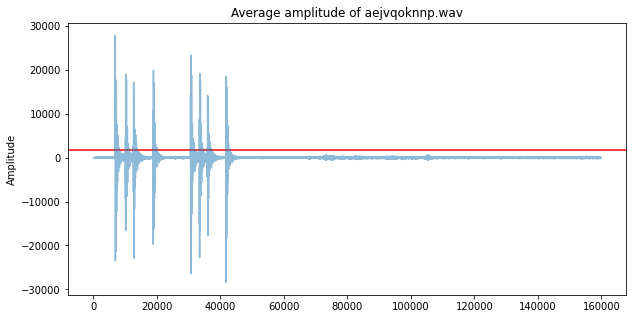

In [3]:
# Plot the average amplitude of the audio file
plot_average_amplitude(signals[0], title="Average amplitude of " + fileNames[0])
save_audio(signals[0], "data/audio/average.wav")

In [10]:
shiftedSignals = []

for signal in signals:
    avg = np.average(np.abs(signal))
    firstPeak = 0
    for i in range(len(signal)):
        if np.abs(signal[i]) > avg * 5:
            firstPeak = i
            break
    
    firstPeak = firstPeak - 1000 if firstPeak > 1000 else 0
    shiftedSignal = signal[firstPeak:]
    # Pad with zeros to make all signals the same length
    shiftedSignal = np.pad(shiftedSignal, (0, len(signal) - len(shiftedSignal)), 'constant')
    shiftedSignals.append(shiftedSignal)

folderToSave = "data/adjustedAudio/"

for i, signal in enumerate(shiftedSignals):
    f = fileNames[i]
    print(f)
    save_audio(signal, folderToSave + f, denormalize=False)


aejvqoknnp.wav
afceoescqs.wav
cgxwaehnir.wav
dumxartuej.wav
fseivkaego.wav
heddrodrmd.wav
ieaxshpxwj.wav
iiuanaofgh.wav
jpjcecupwp.wav
kttcqvdgul.wav
mokhicvkqf.wav
mxhplmsaoy.wav
nekumenpgv.wav
nvdmllxvqy.wav
oagvqxyqxz.wav
ooyevtcxvf.wav
pxtgqsabnh.wav
rjrqbatlca.wav
rupzhrxnvo.wav
tkaorzfyzc.wav
tsoxcpgasb.wav
ugsvpqnwjq.wav
uqvsgllfeq.wav
xmclwscjcz.wav
xwrxxvztrb.wav
ztvloagxul.wav
zviuujuuou.wav
